In [1]:
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

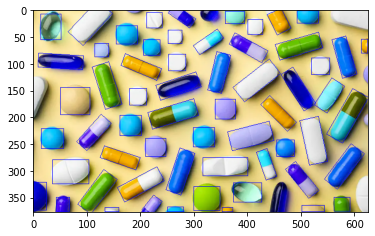

In [3]:
file = open(r'ann.txt', 'r')
Lines = file.readlines()

for i in range(len(Lines)):
    Lines[i]=Lines[i].strip()

img=cv2.imread(r'image\test.png',0)
mask=img.copy()
index=0
result=[]
while(index<=len(Lines)-1):
    mask[:,:]=0
    if(Lines[index][0]=='I'):
        index+=1
        continue
    else:
        while(index<=len(Lines)-1 and Lines[index][0]!='I'):
            line=Lines[index].split()
            line[0]=int(line[0])
            line[1]=int(line[1])
            mask[line[0],line[1]]=255
            index+=1
        #Co mask roi
        ret, thresh = cv2.threshold(mask, 127, 255, 0)
        contours,_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        tmp=0
        for i in range(len(contours)):
            if(len(contours[i])>len(contours[tmp])):
                tmp=i
        rect = cv2.minAreaRect(contours[tmp])
        (x,y),(w,h), a = rect
        box = cv2.boxPoints(rect)
        box = np.int0(box) #turn into ints
        result.append(box)

img=cv2.imread(r'image\test.png')
for box in result:
    img = cv2.drawContours(img.copy(),[box],0,(0,0,255),1)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)